In [ ]:
import pandas as pd
import gc
from google.colab import drive
drive.mount('/content/drive')

data_root = '/content/drive/MyDrive/부트캠프/'
data_path = data_root + '11_파이널/'

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# 그래프 기본 설정
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False
import matplotlib as mpl
import matplotlib.font_manager as fm

# 폰트 파일 경로 지정
font_path = '/content/drive/MyDrive/utils/NanumGothic.ttf'

# 폰트 등록 및 matplotlib 설정
font_name = fm.FontProperties(fname=font_path).get_name()
fm.fontManager.addfont(font_path)
mpl.rc('font', family=font_name)

In [65]:
df81 = pd.read_parquet(data_path + 'train/8.성과정보/201807_train_성과정보.parquet')
df82 = pd.read_parquet(data_path + 'train/8.성과정보/201808_train_성과정보.parquet')
df83 = pd.read_parquet(data_path + 'train/8.성과정보/201809_train_성과정보.parquet')
df84 = pd.read_parquet(data_path + 'train/8.성과정보/201810_train_성과정보.parquet')
df85 = pd.read_parquet(data_path + 'train/8.성과정보/201811_train_성과정보.parquet')
df86 = pd.read_parquet(data_path + 'train/8.성과정보/201812_train_성과정보.parquet')

In [66]:
col_to_drop = df81.columns[[2,3, 10,9, 17,16, 24,23]]
col_to_drop

Index(['증감율_이용건수_신용_전월', '증감율_이용건수_신판_전월', '증감율_이용금액_신판_전월', '증감율_이용금액_신용_전월',
       '증감율_이용건수_신판_분기', '증감율_이용건수_신용_분기', '증감율_이용금액_신판_분기', '증감율_이용금액_신용_분기'],
      dtype='object')

In [74]:
df81 = pd.read_parquet(data_path + 'test/8.성과정보/201807_test_성과정보.parquet')
df82 = pd.read_parquet(data_path + 'test/8.성과정보/201808_test_성과정보.parquet')
df83 = pd.read_parquet(data_path + 'test/8.성과정보/201809_test_성과정보.parquet')
df84 = pd.read_parquet(data_path + 'test/8.성과정보/201810_test_성과정보.parquet')
df85 = pd.read_parquet(data_path + 'test/8.성과정보/201811_test_성과정보.parquet')
df86 = pd.read_parquet(data_path + 'test/8.성과정보/201812_test_성과정보.parquet')

In [75]:
df8t = pd.concat([df81, df82, df83, df84, df85, df86])
df8t = df8t.drop(columns=col_to_drop)
del df81
del df82
del df83
del df84
del df85
del df86
gc.collect()

0

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
ssc = StandardScaler()

def dimension_reduction(data, n_components=1):
    scaled_data = ssc.fit_transform(data)

    pca = PCA(n_components=n_components)
    pca.fit(scaled_data)
    rest_pca = pca.transform(scaled_data)

    # 주성분 분석 결과 출력
    print("주성분 비율:", pca.explained_variance_ratio_)
    print("주성분 벡터 (components):\n", pca.components_)

    # 주성분을 기준으로 변환된 데이터
    transformed_data = pca.transform(scaled_data)

    # 변환된 데이터 출력
    print("변환된 데이터 (주성분 공간):\n", transformed_data)
    return transformed_data

In [76]:
df8 = pd.concat([df8, df8t])
del df8t
gc.collect()

90

In [79]:
hrm = df8['혜택수혜율_R3M'].median()
hbm = df8['혜택수혜율_B0M'].median()
df8['혜택수혜율_R3M'].fillna(hrm, inplace=True)
df8['혜택수혜율_B0M'].fillna(hbm, inplace=True)

In [80]:
df8.isna().sum()

,0
기준년월,0
ID,0
증감율_이용건수_일시불_전월,0
증감율_이용건수_할부_전월,0
증감율_이용건수_CA_전월,0
증감율_이용건수_체크_전월,0
증감율_이용건수_카드론_전월,0
증감율_이용금액_일시불_전월,0
증감율_이용금액_할부_전월,0
증감율_이용금액_CA_전월,0


In [ ]:
df8['혜택수혜_100'] = (df8['혜택수혜율_R3M'] > 99) | (df8['혜택수혜율_B0M'] > 99)
df8.loc[df8['혜택수혜율_R3M'] > 99, '혜택수혜율_R3M'] = hrm
df8.loc[df8['혜택수혜율_B0M'] > 99, '혜택수혜율_B0M'] = hbm

In [ ]:
df8['혜택수혜율_R3M'].describe()

,혜택수혜율_R3M
count,2.400000e+06
mean,1.180492e+00
std,1.717993e+00
min,-2.349918e+00
25%,0.000000e+00
50%,7.611990e-01
75%,1.626099e+00
max,1.875578e+01


In [97]:
rests = df8.loc[:,['변동률_RVCA평잔','변동률_RV일시불평잔']]
rests.corr()

,변동률_RVCA평잔,변동률_RV일시불평잔
변동률_RVCA평잔,1.000000,0.953751
변동률_RV일시불평잔,0.953751,1.000000


In [98]:
trans_rests = dimension_reduction(rests, 1)

주성분 비율: [0.9768755]
주성분 벡터 (components):
 [[0.70710678 0.70710678]]
변환된 데이터 (주성분 공간):
 [[ 0.32173344]
 [ 0.60662315]
 [ 0.34056121]
 ...
 [-5.93075057]
 [ 0.32173344]
 [ 0.32173344]]


In [99]:
df8['변동률_RV평잔'] = trans_rests
df8.drop(columns=rests.columns, inplace=True, axis=1)
df8.columns

Index(['기준년월', 'ID', '증감율_이용건수_일시불_전월', '증감율_이용건수_할부_전월', '증감율_이용건수_CA_전월',
       '증감율_이용건수_체크_전월', '증감율_이용금액_일시불_전월', '증감율_이용금액_할부_전월', '증감율_이용금액_CA_전월',
       '증감율_이용금액_체크_전월', '증감율_이용건수_할부_분기', '증감율_이용건수_CA_분기', '증감율_이용금액_할부_분기',
       '증감율_이용금액_CA_분기', '변동률_일시불평잔', '변동률_할부평잔', '변동률_CA평잔', '변동률_카드론평잔',
       '변동률_잔액_B1M', '변동률_잔액_일시불_B1M', '변동률_잔액_CA_B1M', '혜택수혜율_R3M',
       '혜택수혜율_B0M', '잔액_한도소진율', '증감율_카드론_분기', '증감율_일시불_분기', '증감율_체크_분기',
       '증감율_카드론_전월', '변동률_RV평잔'],
      dtype='object')

In [ ]:
del rests
del trans_rests
gc.collect()

6

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def calculate_vif(X):
    X = add_constant(X)  # 상수항 추가 (intercept)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

In [100]:
numeric_cols = df8.select_dtypes(include='number')
vif_result = calculate_vif(numeric_cols)
print(vif_result)

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


            feature       VIF
0             const  0.000000
1              기준년월  1.049702
2   증감율_이용건수_일시불_전월  2.254164
3    증감율_이용건수_할부_전월  1.633855
4    증감율_이용건수_CA_전월  1.528208
5    증감율_이용건수_체크_전월  1.312423
6   증감율_이용금액_일시불_전월  1.836992
7    증감율_이용금액_할부_전월  1.597020
8    증감율_이용금액_CA_전월  1.639051
9    증감율_이용금액_체크_전월  1.328326
10   증감율_이용건수_할부_분기  4.018900
11   증감율_이용건수_CA_분기  4.714227
12   증감율_이용금액_할부_분기  4.149015
13   증감율_이용금액_CA_분기  4.534361
14        변동률_일시불평잔  4.584746
15         변동률_할부평잔  1.740334
16         변동률_CA평잔  6.064563
17        변동률_카드론평잔  4.152285
18       변동률_잔액_B1M  2.854540
19   변동률_잔액_일시불_B1M  3.308011
20    변동률_잔액_CA_B1M  1.220934
21        혜택수혜율_R3M  7.933409
22        혜택수혜율_B0M  7.898082
23         잔액_한도소진율  1.147102
24       증감율_카드론_분기  1.065970
25       증감율_일시불_분기  2.922087
26        증감율_체크_분기  1.191826
27       증감율_카드론_전월  1.121518
28         변동률_RV평잔  7.918519


In [ ]:
del numeric_cols
gc.collect()

18

In [102]:
train8 = df8.iloc[:2400000,:]
test8 = df8.iloc[2400000:,:]
train8.info()
test8.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2400000 entries, 0 to 399999
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   기준년월             int64  
 1   ID               object 
 2   증감율_이용건수_일시불_전월  float64
 3   증감율_이용건수_할부_전월   float64
 4   증감율_이용건수_CA_전월   float64
 5   증감율_이용건수_체크_전월   float64
 6   증감율_이용금액_일시불_전월  float64
 7   증감율_이용금액_할부_전월   float64
 8   증감율_이용금액_CA_전월   float64
 9   증감율_이용금액_체크_전월   float64
 10  증감율_이용건수_할부_분기   float64
 11  증감율_이용건수_CA_분기   float64
 12  증감율_이용금액_할부_분기   float64
 13  증감율_이용금액_CA_분기   float64
 14  변동률_일시불평잔        float64
 15  변동률_할부평잔         float64
 16  변동률_CA평잔         float64
 17  변동률_카드론평잔        float64
 18  변동률_잔액_B1M       float64
 19  변동률_잔액_일시불_B1M   float64
 20  변동률_잔액_CA_B1M    float64
 21  혜택수혜율_R3M        float64
 22  혜택수혜율_B0M        float64
 23  잔액_한도소진율         float64
 24  증감율_카드론_분기       float64
 25  증감율_일시불_분기       float64
 26  증감율_체크_분기        float64
 27  증감율_카드론_전월       f

In [103]:
train8.to_parquet(data_path + 'processed/train8.parquet', index=False)
test8.to_parquet(data_path + 'processed/test8.parquet', index=False)

In [ ]:
df8.describe()

,기준년월,증감율_이용건수_일시불_전월,증감율_이용건수_할부_전월,증감율_이용건수_CA_전월,증감율_이용건수_체크_전월,증감율_이용금액_일시불_전월,증감율_이용금액_할부_전월,증감율_이용금액_CA_전월,증감율_이용금액_체크_전월,증감율_이용건수_할부_분기,...,변동률_잔액_일시불_B1M,변동률_잔액_CA_B1M,혜택수혜율_R3M,혜택수혜율_B0M,잔액_한도소진율,증감율_카드론_분기,증감율_카드론_전월,증감율_일시불_분기,증감율_체크_분기,변동률_RV평잔
count,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,...,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06
mean,2.018095e+05,-1.959183e-02,-8.642645e-02,-1.592283e-02,-2.235531e-02,9.256195e-02,-4.335001e-02,-8.176223e-03,-9.051437e-03,-1.840541e-01,...,3.199591e-03,-3.324818e-03,1.180492e+00,1.356823e+00,-7.948605e-17,3.678243e-17,-5.139592e-18,2.520058e-17,3.728573e-17,-5.686118e-17
std,1.707825e+00,3.078197e-01,5.119002e-01,1.866209e-01,8.128773e-02,4.619206e-01,4.434329e-01,1.402585e-01,1.269151e-01,8.286696e-01,...,2.862019e-01,7.944772e-02,1.717993e+00,1.766983e+00,2.758047e+00,1.406933e+00,1.403632e+00,1.397753e+00,1.401240e+00,1.397822e+00
min,2.018070e+05,-1.999996e+00,-1.999996e+00,-1.999996e+00,-1.199311e+00,-2.003836e+00,-1.999996e+00,-1.999996e+00,-1.999996e+00,-1.999996e+00,...,-1.999996e+00,-1.999996e+00,-2.349918e+00,-2.607296e+00,-2.105965e+00,-9.174494e+00,-4.118285e+01,-5.019951e+00,-7.893898e+00,-5.939170e+00
25%,2.018080e+05,-6.861702e-02,0.000000e+00,0.000000e+00,0.000000e+00,2.208000e-05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-5.386280e-02,0.000000e+00,0.000000e+00,0.000000e+00,-1.970720e+00,1.438034e-01,4.857074e-02,-3.786267e-01,8.636192e-02,3.212568e-01
50%,2.018095e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.941491e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,7.611990e-01,9.851748e-01,-1.243447e+00,1.438034e-01,4.857074e-02,1.994865e-01,8.636192e-02,3.212568e-01
75%,2.018110e+05,1.153946e-02,0.000000e+00,0.000000e+00,0.000000e+00,2.525388e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.484067e-02,0.000000e+00,1.626099e+00,1.943995e+00,9.197678e-01,1.438034e-01,4.857074e-02,3.267911e-01,8.636192e-02,3.212568e-01
max,2.018120e+05,1.999996e+00,1.999996e+00,1.999996e+00,7.340224e-01,2.003318e+00,1.999996e+00,1.999996e+00,1.999996e+00,1.999996e+00,...,1.999996e+00,1.999996e+00,1.875578e+01,1.514123e+01,1.192722e+01,9.462101e+00,4.857074e-02,5.396573e+00,8.066622e+00,4.062026e+00


In [ ]:
d8 = df8.describe()
d8.iloc[:,2]


,증감율_이용건수_할부_전월
count,2.400000e+06
mean,-8.642645e-02
std,5.119002e-01
min,-1.999996e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,1.999996e+00


In [ ]:
len(df8['증감율_이용건수_할부_전월'].unique())

55263

<Axes: ylabel='증감율_이용건수_할부_전월'>

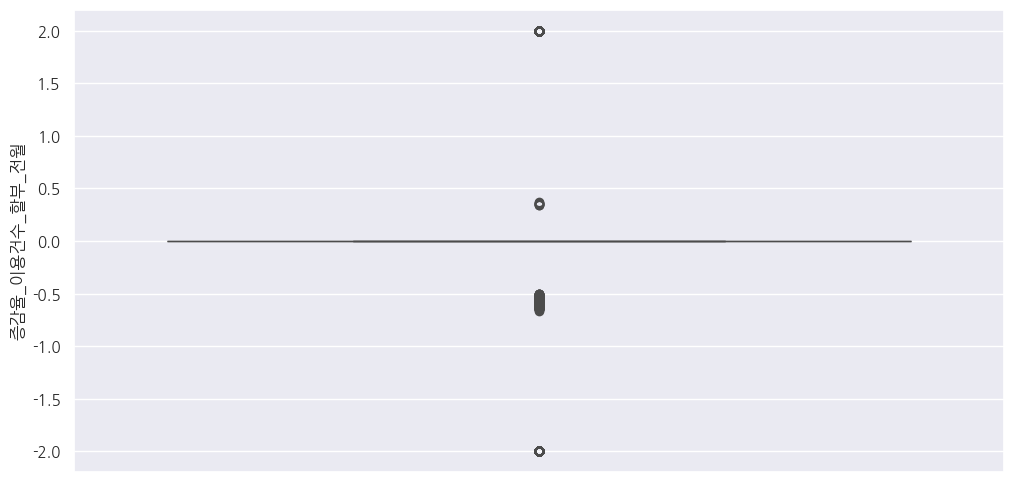

In [ ]:
sns.boxplot(df8['증감율_이용건수_할부_전월'])